In [60]:
using Images, ImageView, ImageMagick, ImageMorphology
using GLMakie


LoadError: ArgumentError: Package GLMakie not found in current path.
- Run `import Pkg; Pkg.add("GLMakie")` to install the GLMakie package.

In [54]:
#function screenshot()
#    data = read(pipeline(`xwd -root`, `convert xwd:- png:-`))
#    im = ImageMagick.load_(data)
#end

screenshot (generic function with 1 method)

In [61]:
src = ImageMagick.load("screenshot:");
hsv = HSV.(src)
cs = channelview(hsv);

LoadError: 

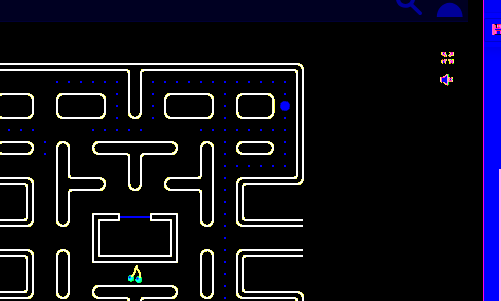

In [58]:
pos_janela=[200 500 200 700]
csn = cs[:,pos_janela[1]:pos_janela[2],pos_janela[3]:pos_janela[4]];
csni = colorview(RGB,csn)

In [59]:
obs_img = GLMakie.Observable(GLMakie.rotr90(csni))
scene = GLMakie.Scene(camera=GLMakie.campixel!, resolution=reverse(size(csni)))
GLMakie.image!(scene, obs_img)

LoadError: UndefVarError: `GLMakie` not defined

In [ ]:
display(scene)
x=(1,2)

In [ ]:
for i=1:10
    screenshot = ImageMagick.load("screenshot:");
    hsv = HSV.(screenshot)
    cs = channelview(hsv);
    #csn = cs[:,li:lf,ci:cf];
    csn = cs[:,pos_janela[1]:pos_janela[2],pos_janela[3]:pos_janela[4]];

    csni = colorview(RGB,csn)
    map_claro = csn[3,:,:].>=0.1 .&& csn[3,:,:].<=2;
    map_claro = opening(erode(map_claro))
    lc = label_components(map_claro)
    comp1 = lc .== 5
    x = ([findmax(sum(comp1,dims=1)) findmax(sum(comp1,dims=2))])
    obs_img = GLMakie.Observable(GLMakie.rotr90(Gray.(comp1)))
    GLMakie.image!(scene, obs_img)
    sleep(0.01)
   
   
end